# Sales Prediction using Linear Regression

In [1]:
#Import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data and create dataframe
data=pd.read_csv("advertising.csv")
df=pd.DataFrame(data)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
#View first 5 rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Count shape
df.shape

(200, 4)

In [5]:
#View the data mathematically
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#Get the data type and count value for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#Data cleaning
df.isnull().sum() #as there is no null value present data is cleaned

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

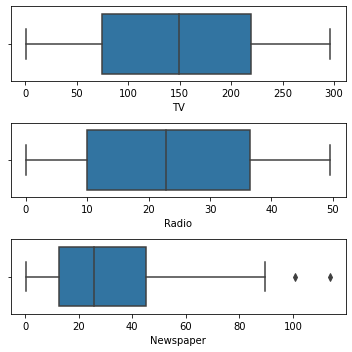

In [8]:
#Outlier Analysis
fig,axis = plt.subplots(3, figsize=(5,5))
plot1 = sns.boxplot(df["TV"], ax = axis[0])
plot2 = sns.boxplot(df["Radio"], ax = axis[1])
plot3 = sns.boxplot(df["Newspaper"], ax = axis[2])
plt.tight_layout()  #The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust
#subplot parameters to give specified padding.

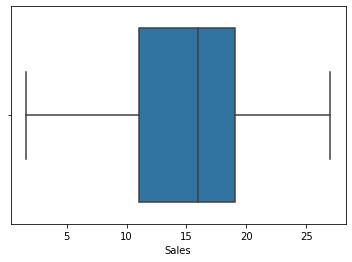

In [9]:
sns.boxplot(df["Sales"])
plt.show()

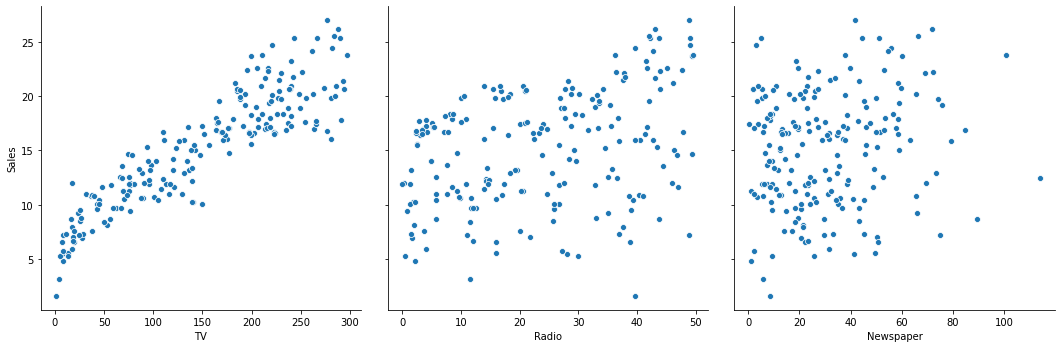

In [10]:
#Pairplot
sns.pairplot(df, x_vars=["TV","Radio","Newspaper"], y_vars="Sales",height=5,aspect=1,kind='scatter')
plt.show()

In [11]:
#Correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


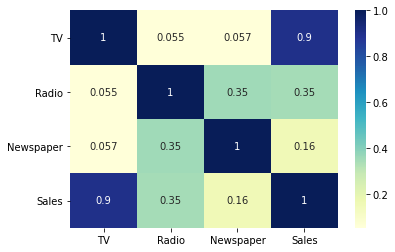

In [12]:
#Heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [13]:
#Building model 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df["TV"],df["Sales"],test_size = 0.2,random_state=20)
xtrain.head()

152    197.6
67     139.3
133    219.8
59     210.7
63     102.7
Name: TV, dtype: float64

In [14]:
import statsmodels.api as sm
#Add a constant to get intercept
xtrain_sm = sm.add_constant(xtrain)

#Fit the regression line using OLS(Ordinary least squares)
lr = sm.OLS(ytrain,xtrain_sm).fit()

In [15]:
lr.params

const    7.079223
TV       0.054282
dtype: float64

In [16]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     667.2
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.36e-58
Time:                        20:48:57   Log-Likelihood:                -353.51
No. Observations:                 160   AIC:                             711.0
Df Residuals:                     158   BIC:                             717.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0792      0.357     19.848      0.0

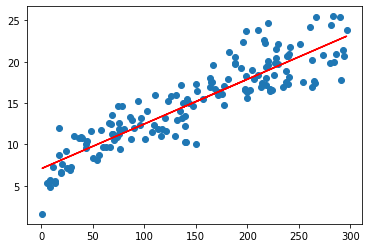

In [17]:
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, 7.0792 + 0.054*xtrain, 'r')
plt.show()

In [18]:
#Model Evaluation
ytrainpred = lr.predict(xtrain_sm)
res = (ytrain - ytrainpred)

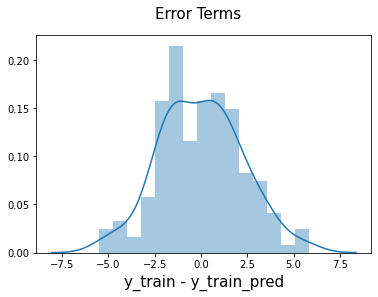

In [19]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

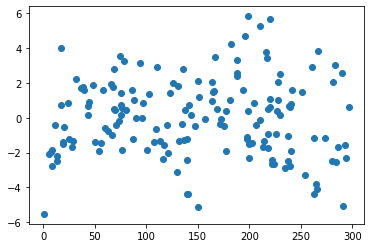

In [20]:
plt.scatter(xtrain,res)
plt.show()

In [21]:
#Predictions on the test set
# Add a constant to X_test
xtest_sm = sm.add_constant(xtest)

# Predict the y values corresponding to X_test_sm
ypred = lr.predict(xtest_sm)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
#viewing RMSE
np.sqrt(mean_squared_error(ytest, ypred))

2.5932640314404773

In [24]:
#Checking the r-squared on the test set
r_squared = r2_score(ytest, ypred)
r_squared

0.8199796701584716

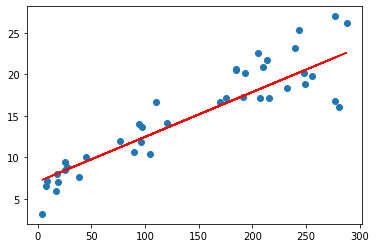

In [25]:
#Visualizing the fit on the test set
plt.scatter(xtest, ytest)
plt.plot(xtest, 7.0792 + 0.054 * xtest, 'r')
plt.show()

# Using Linear regression model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()

x = np.array(df.TV).reshape(-1, 1)
y = np.array(df.Sales)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=20)

In [27]:
regressor.fit(xtrain,ytrain)

LinearRegression()

In [28]:
ypred=regressor.predict(xtest)
ypred

array([22.316301  , 20.58469148, 12.37175977, 22.09917128, 20.94295552,
       18.7716583 , 16.31809245, 12.19262775, 20.10157785,  9.15281166,
        8.46885303, 13.62025567, 17.45259525,  8.05087832, 18.66852169,
       22.11002777,  7.30178078, 18.3048294 ,  8.09973251,  8.01288062,
       20.5629785 , 18.45682021, 13.03943366, 20.28070987, 18.20712103,
       12.75716503, 19.67817489,  7.50262577,  7.55147996, 17.11604418,
       12.2740514 , 17.11604418,  8.44171182,  8.53399195, 22.69084977,
       17.56658835,  9.50564745, 11.94835682, 11.22097225, 16.61664582])

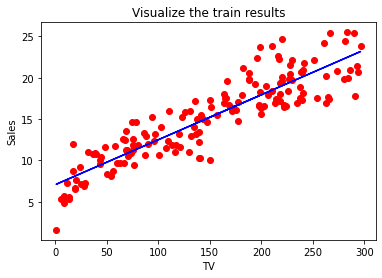

In [29]:
plt.scatter(xtrain,ytrain,color="red")
plt.plot(xtrain,regressor.predict(xtrain),color="blue")
plt.title("Visualize the train results")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

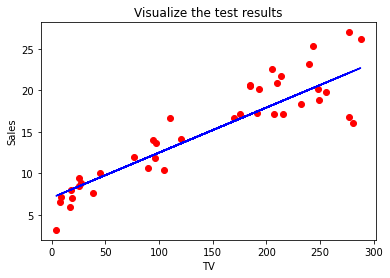

In [30]:
plt.scatter(xtest,ytest,color="red")
plt.plot(xtest,regressor.predict(xtest),color="blue")
plt.title("Visualize the test results")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [31]:
#viewing RMSE
np.sqrt(mean_squared_error(ytest, ypred))

2.5932640314404787

In [32]:
#Checking the r-squared on the test set
r_squared = r2_score(ytest, ypred)
r_squared

0.8199796701584714